In [2]:
from IPython.display import Image
import tensorflow as tf

# Softmax Regression (Multinomial Logistic Regression)
- 여러개의 binary classification 이 합쳐진 개념
- hypothesis = softmax(XW+b)
    - softmax() : 클래스가 여러개일 때 각 클래스가 y 일 확률을 출력
- cost function (loss function) : cross-entropy

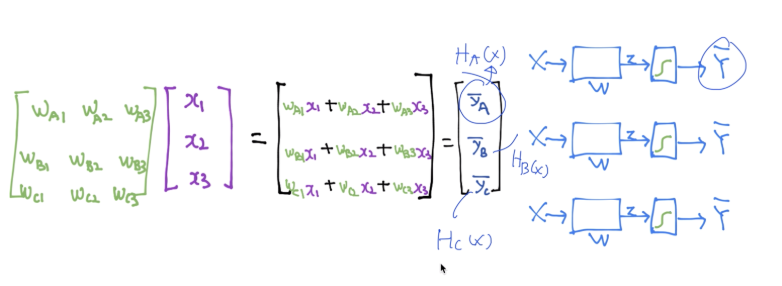

In [3]:
Image("img/TF_softmax.png") # code안에서 나오게 할 때

In [1]:

tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]

# Multi Class 인 경우, one-hot encoding
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1))) #argmax() : softmax 결과에 따라 1에 가장 가까운 값 계산 

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

//anaconda2/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


0 6.926112
200 0.6005018
400 0.47295803
600 0.37342983
800 0.28018403
1000 0.23280531
1200 0.21065348
1400 0.19229904
1600 0.17682338
1800 0.16359547
2000 0.15216155
--------------
[[1.3890503e-03 9.9860185e-01 9.0612566e-06]] [1]
--------------
[[0.9311919  0.06290218 0.00590591]] [0]
--------------
[[1.2732840e-08 3.3411290e-04 9.9966586e-01]] [2]
--------------
[[1.3890502e-03 9.9860185e-01 9.0612657e-06]
 [9.3119192e-01 6.2902153e-02 5.9059118e-03]
 [1.2732840e-08 3.3411290e-04 9.9966586e-01]] [1 0 2]


- one hot encoding
    - Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
        one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)

    - Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
        reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)

- hypothesis
    - hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
        - (이때, tf.matmul(X,W) + b 를 logit 이라 부름, softmax 전단계)
    - logits = tf.matmul(X, W) + b
    
      hypothesis = tf.nn.softmax(logits)

    
- cost function
    - cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
    - cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=tf.stop_gradient([Y_one_hot])))


In [4]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('data/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

'''
(101, 16) (101, 1)
'''

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6 shape = (?,1)

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot shape = (?, 1, 7)
### ex. [[0], [3]] --- tf.one_hot() ---> [[[1,0,0,0,0,0,0], [0,1,0,0,0,0,0]]]
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes]) # shape = (?, 7)
print("reshape one_hot:", Y_one_hot)

'''
one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)
'''

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=tf.stop_gradient([Y_one_hot])))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_data, Y: y_data})
                                        
        if step % 100 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    # [[1], [0]] --- flatten ---> [1,0]
    
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

(101, 16) (101, 1)
one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)
Step:     0	Cost: 4.144	Acc: 25.74%
Step:   100	Cost: 0.654	Acc: 79.21%
Step:   200	Cost: 0.418	Acc: 87.13%
Step:   300	Cost: 0.308	Acc: 92.08%
Step:   400	Cost: 0.245	Acc: 95.05%
Step:   500	Cost: 0.205	Acc: 95.05%
Step:   600	Cost: 0.176	Acc: 97.03%
Step:   700	Cost: 0.154	Acc: 98.02%
Step:   800	Cost: 0.137	Acc: 98.02%
Step:   900	Cost: 0.123	Acc: 98.02%
Step:  1000	Cost: 0.112	Acc: 99.01%
Step:  1100	Cost: 0.103	Acc: 99.01%
Step:  1200	Cost: 0.094	Acc: 100.00%
Step:  1300	Cost: 0.088	Acc: 100.00%
Step:  1400	Cost: 0.082	Acc: 100.00%
Step:  1500	Cost: 0.076	Acc: 100.00%
Step:  1600	Cost: 0.072	Acc: 100.00%
Step:  1700	Cost: 0.068	Acc: 100.00%
Step:  1800	Cost: 0.064	Acc: 100.00%
Step:  1900	Cost: 0.061	Acc: 100.00%
Step:  2000	Cost: 0.058	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y